In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

In [2]:
results = pd.read_csv('../main/log/tie.csv', names=["algo", "experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
#                                         "test_fitness","elite_size",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"])

In [3]:
results.head()

,algo,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,tie_inflate,diff_sn_inflate,size_sn_inflate,tie_deflate,diff_sn_deflate,size_sn_deflate,tie_mb_deflate,diff_sn_mb_deflate,size_sn_mb_deflate
0,SLIM*1SIG,20a2c0a2-177e-11ef-a0f8-049226d8b1cb,yatch,0,0,15.497589,0.123031,1490.0,0.0,0,0,1.0,100,100,1.0,100,100
1,SLIM*1SIG,20a2c0a2-177e-11ef-a0f8-049226d8b1cb,yatch,0,1,15.032771,0.077030,1978.0,0.0,0,0,1.0,100,100,1.0,100,100
2,SLIM*1SIG,20a2c0a2-177e-11ef-a0f8-049226d8b1cb,yatch,0,2,15.032771,0.032006,1148.0,0.0,0,0,1.0,100,100,1.0,100,100
3,SLIM*1SIG,20a2c0a2-177e-11ef-a0f8-049226d8b1cb,yatch,0,3,15.032771,0.067506,1378.0,0.0,0,0,1.0,100,100,1.0,100,100
4,SLIM*1SIG,20a2c0a2-177e-11ef-a0f8-049226d8b1cb,yatch,0,4,15.032771,0.030046,1100.0,0.0,0,0,1.0,100,100,1.0,100,100


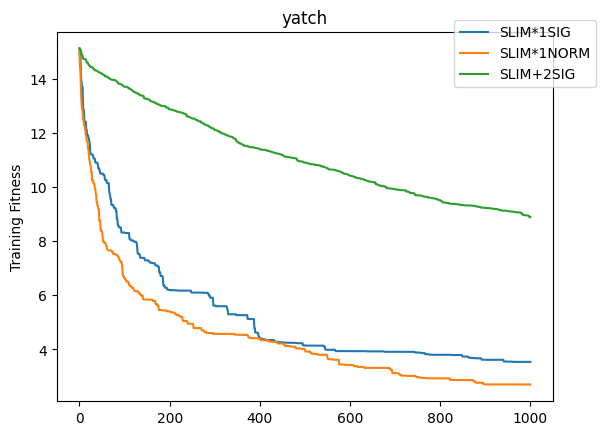

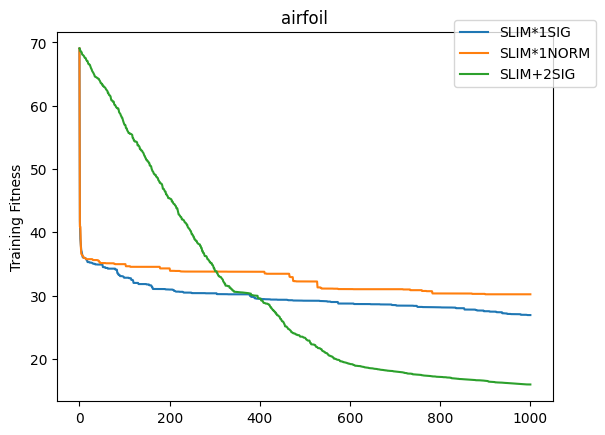

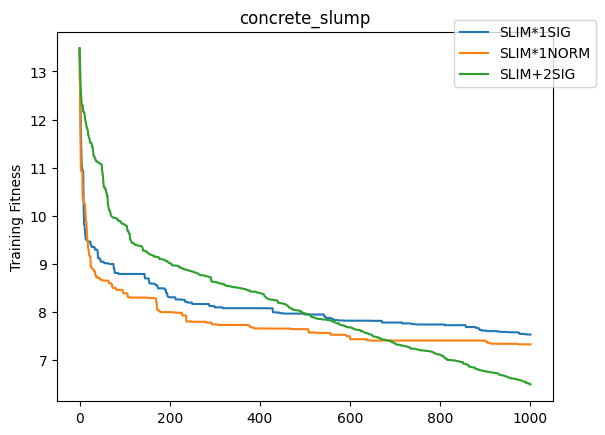

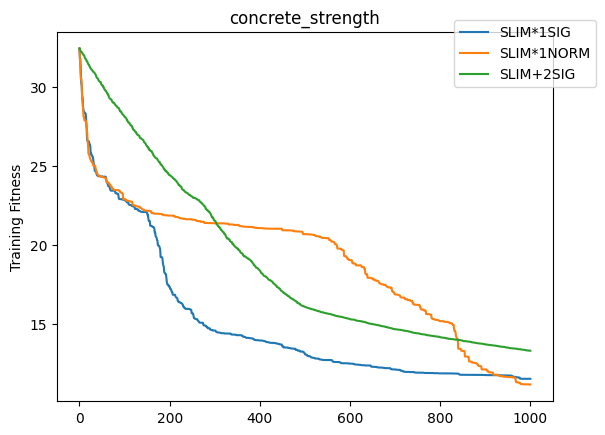

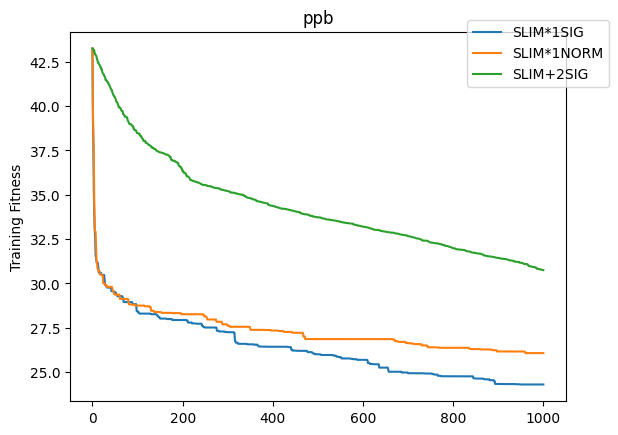

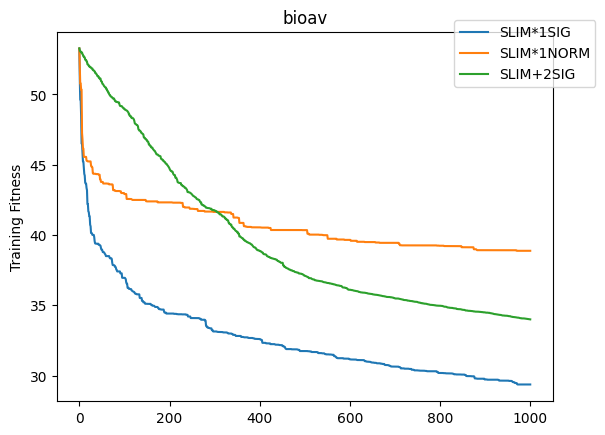

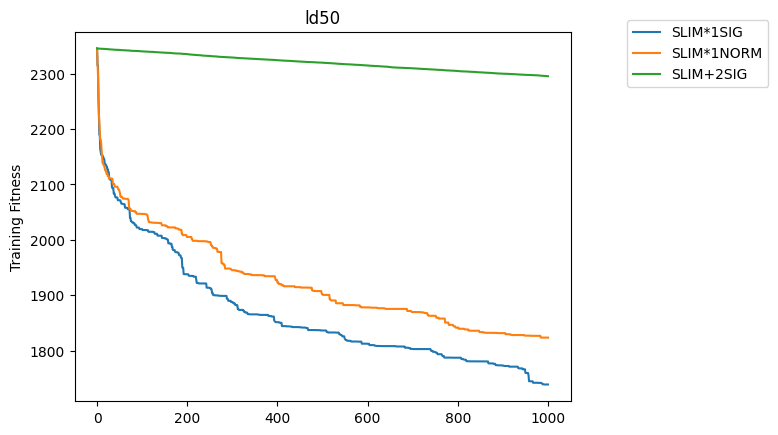

In [10]:
for data in results.dataset.unique():
    gs = gridspec.GridSpec(2, 2)
    gs.update( wspace=0.4)
    pl.figure()
    for algo in results.algo.unique():
        
            
            grouped = results.query("algo == @algo and dataset == @data")[['generation',  "training_fitness"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[:, :]) 
            pl.plot(grouped.index, grouped['training_fitness'], label = algo)
#             pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax1.set_ylabel('Training Fitness')


#             ax2 = pl.subplot(gs[0, 1]) 
#             pl.plot(grouped.index, grouped['test_fitness'], label = algo)
#             pl.axvline(x = th, linestyle = 'dotted', color = 'black')
#             ax2.set_ylabel('Test Fitness')
            
            
#             ax3 = pl.subplot(gs[1, :]) #1,1 
#             pl.plot(grouped.index, grouped['elite_size'], label = algo)
#             pl.axvline(x = th, linestyle = 'dotted', color = 'black')
#             ax3.set_ylim(0, 3000)
#             ax3.set_ylabel('Elite size')
            



    ax1.set_title(data)
    ax1.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()